In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../../datasets/flavors_of_cacao.csv')
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [4]:
df = df.rename(columns={"Company\xa0\n(Maker-if known)": "Company",
                        "Specific Bean Origin\nor Bar Name": "Spec_Bean_Origin_or_Bar_Name",
                        "Review\nDate": "Review_Date",
                        "Cocoa\nPercent": "Cocoa_Percent",
                        "Company\nLocation": "Company_Location",
                        "Bean\nType": "Bean_Type",
                        "Broad Bean\nOrigin": "Broad_Bean_Origin"
                       })

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Company                       1795 non-null   object 
 1   Spec_Bean_Origin_or_Bar_Name  1795 non-null   object 
 2   REF                           1795 non-null   int64  
 3   Review_Date                   1795 non-null   int64  
 4   Cocoa_Percent                 1795 non-null   object 
 5   Company_Location              1795 non-null   object 
 6   Rating                        1795 non-null   float64
 7   Bean_Type                     1794 non-null   object 
 8   Broad_Bean_Origin             1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [6]:
df.isnull().sum()

Company                         0
Spec_Bean_Origin_or_Bar_Name    0
REF                             0
Review_Date                     0
Cocoa_Percent                   0
Company_Location                0
Rating                          0
Bean_Type                       1
Broad_Bean_Origin               1
dtype: int64

In [7]:
missing_val_indication_bean_type = df.Bean_Type.values[0]

def replace_with_nan(missing_val_indication, current_val):
    if current_val == missing_val_indication:
        return np.nan
    else:
        return current_val
      
# replace missing values in all columns
for column in df.columns:
    if df[column].dtype == object:
        df[column] = df[column].apply(lambda x: replace_with_nan(missing_val_indication_bean_type, x))


In [8]:
df.isnull().sum()


Company                           0
Spec_Bean_Origin_or_Bar_Name      0
REF                               0
Review_Date                       0
Cocoa_Percent                     0
Company_Location                  0
Rating                            0
Bean_Type                       888
Broad_Bean_Origin                74
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Company                       1795 non-null   object 
 1   Spec_Bean_Origin_or_Bar_Name  1795 non-null   object 
 2   REF                           1795 non-null   int64  
 3   Review_Date                   1795 non-null   int64  
 4   Cocoa_Percent                 1795 non-null   object 
 5   Company_Location              1795 non-null   object 
 6   Rating                        1795 non-null   float64
 7   Bean_Type                     907 non-null    object 
 8   Broad_Bean_Origin             1721 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [11]:
# get list of categorical features
list_categorical_cols = list(df.columns[df.dtypes == object])
list_categorical_cols


['Company',
 'Spec_Bean_Origin_or_Bar_Name',
 'Cocoa_Percent',
 'Company_Location',
 'Bean_Type',
 'Broad_Bean_Origin']

In [21]:
df['Cocoa_Percent'] = df['Cocoa_Percent'].replace('%','', regex=True)
df['Cocoa_Percent']

0       63
1       70
2       70
3       70
4       70
        ..
1790    70
1791    65
1792    65
1793    62
1794    65
Name: Cocoa_Percent, Length: 1795, dtype: object

In [23]:
df['Cocoa_Percent'] = df['Cocoa_Percent'].astype(float)

In [25]:
# get list of numerical features
list_numerical_cols = list(df.columns[df.dtypes != object])
list_numerical_cols


['REF', 'Review_Date', 'Cocoa_Percent', 'Rating']

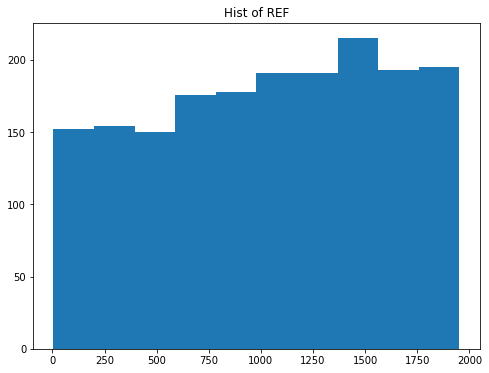

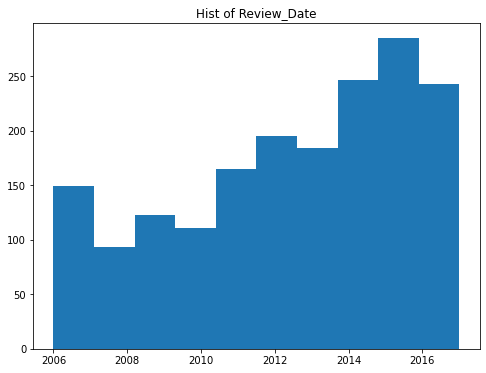

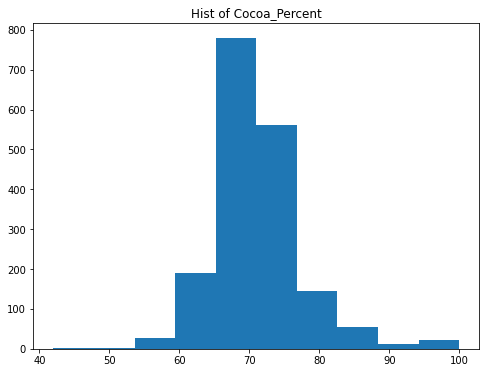

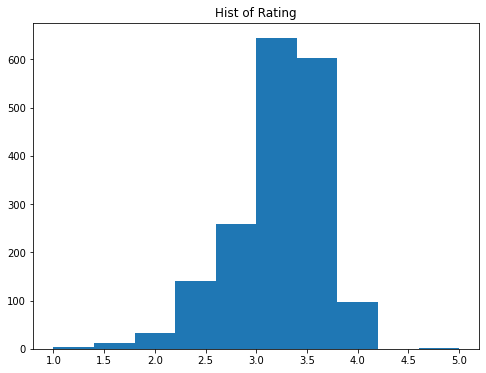

In [26]:
# plot histograms for numerical features
for numerical_feat in list_numerical_cols:
    plt.figure(figsize=(8.0, 6.0))
    plt.hist(df[numerical_feat])
    plt.title(f"Hist of {numerical_feat}")
    plt.show()

In [39]:
# get info about different categories
for cat_feature in list_categorical_cols:
    print(df[cat_feature].value_counts())

Soma               47
Bonnat             27
Fresco             26
Pralus             25
A. Morin           23
                   ..
Condor              1
Whittakers          1
Tsara (Cinagra)     1
Majani              1
Chequessett         1
Name: Company, Length: 416, dtype: int64
Madagascar                               57
Peru                                     45
Ecuador                                  42
Dominican Republic                       37
Venezuela                                21
                                         ..
Bahia, Agri-Forestal Plantation, 2010     1
Malekula P., 2013                         1
Dominican Republic, Batch D2              1
Tanzania, batch a1                        1
Cusco                                     1
Name: Spec_Bean_Origin_or_Bar_Name, Length: 1039, dtype: int64
70.0     672
75.0     222
72.0     189
65.0      78
80.0      72
74.0      50
68.0      47
60.0      43
73.0      40
85.0      36
64.0      34
77.0      33
71.0      31
6

In [40]:
df2.head()

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
Name: Broad_Bean_Origin, dtype: int64

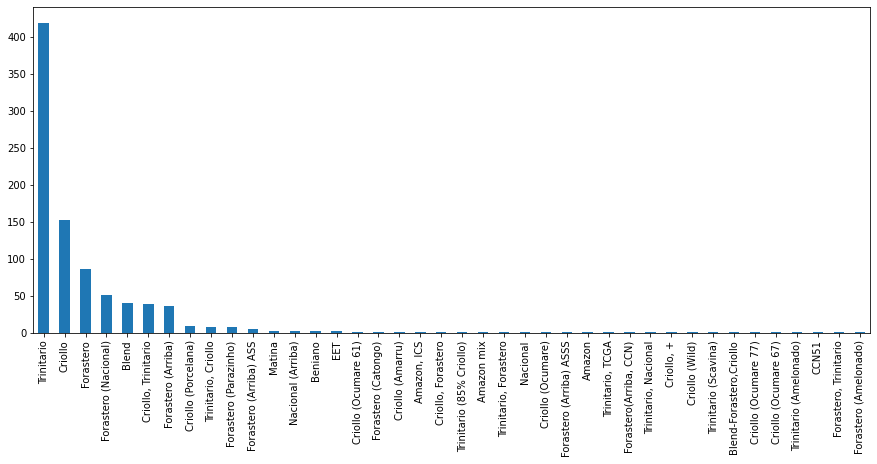

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(15,6))
df['Bean_Type'].value_counts().plot(kind='bar');



In [65]:
def check_category(category, value):
    try:
        if category in value:
            return 1
        else:
            return 0
    except: # catch if input is NaN -> return 0
        return 0
      
def check_NaN(category, value):
    try:
        if category in value:
            return 0
        else:
            return 0
    except: # catch if input is NaN -> return 1
        return 1


In [66]:
# Create one column for the most frequent bean types exists 
# (Criollo, Trinitario, Forsastero, Beniano, Blend, Matina, EET, Nacional, Amazon). 
# 
# Check each bean type for the occurence of one of the categories and add a 1 if present, else a 0.
df["Criollo"] = df["Bean_Type"].apply(lambda x: check_category("Criollo", x))
df["Trinitario"] = df["Bean_Type"].apply(lambda x: check_category("Trinitario", x))
df["Forsastero"] = df["Bean_Type"].apply(lambda x: check_category("Forsastero", x))
df["Beniano"] = df["Bean_Type"].apply(lambda x: check_category("Beniano", x))
df["Blend"] = df["Bean_Type"].apply(lambda x: check_category("Blend", x))
df["Matina"] = df["Bean_Type"].apply(lambda x: check_category("Matina", x))
df["EET"] = df["Bean_Type"].apply(lambda x: check_category("EET", x))
df["Nacional"] = df["Bean_Type"].apply(lambda x: check_category("Nacional", x))
df["Amazon"] = df["Bean_Type"].apply(lambda x: check_category("Amazon", x))
df["Unkown_Bean_Type"] = df["Bean_Type"].apply(lambda x: check_NaN("dummy", x))     

# Add a feature called "Num_Beans" to count the amount of beans per chocolate bar.
df["Num_Beans"] = np.sum(df[["Criollo", "Trinitario", "Forsastero", "Beniano", "Matina", "EET", "Nacional", "Amazon"]], axis=1)

# Add feature called "Is_Blend" to hold whether a chocolate bar is a mixture of more beans or not.
df["Is_Blend"] = 0
df.loc[np.logical_or(df["Blend"] == 1, df["Num_Beans"] > 0), "Is_Blend"] = 1

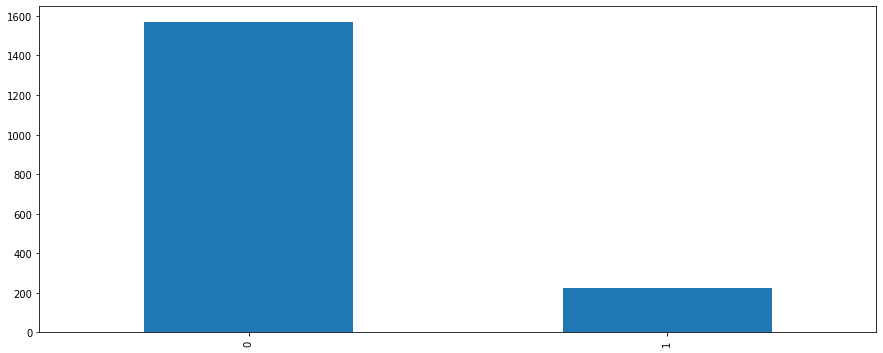

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(15,6))
df['Criollo'].value_counts().plot(kind='bar');



In [68]:
# split using the comma and hold only first part
df["Spec_Bean_Origin_or_Bar_Name"] = df["Spec_Bean_Origin_or_Bar_Name"].apply(lambda x: x.split(",")[0])

# remove w/ nibs
df["Spec_Bean_Origin_or_Bar_Name"] = (df["Spec_Bean_Origin_or_Bar_Name"]
                                          .apply(lambda x: x.replace(" w/ nibs", "")))

# get list of single occurences
list_occurences = df["Spec_Bean_Origin_or_Bar_Name"].value_counts()
list_origin_count = list(zip(list_occurences.values, list_occurences.index))
list_single_categories = [list_origin_count[index][1] 
                          for index in range(len(list_origin_count)) 
                          if list_origin_count[index][0] == 1]

# replace
def replace_single_occurence(value, list_single_categories):
    if value in list_single_categories:
        return "Other"
    else:
        return value
    
    
df["Spec_Bean_Origin_or_Bar_Name"] = (df["Spec_Bean_Origin_or_Bar_Name"]
                                        .apply(lambda x: replace_single_occurence(x, list_single_categories)))

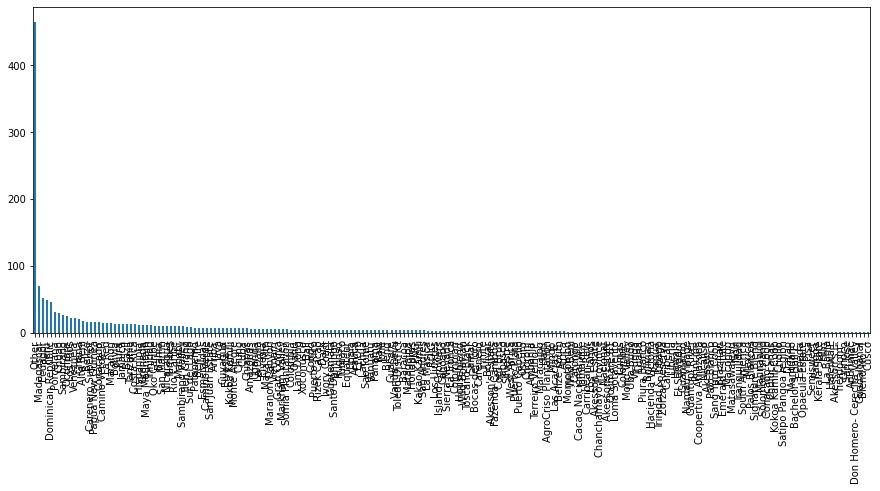

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(15,6))
df['Spec_Bean_Origin_or_Bar_Name'].value_counts().plot(kind='bar');